# Deposit contract success or not. Bank-Marketing related issue 

In this document will be analyzed this [dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The goal will be wrap binary clasifications algoritms for DSLibrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/bank-full.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Cleaning data

Nothing to clean!! 

## Showing Data

### Percentage of Deposit Contracted by group

In [6]:
def percDep(group):
    g_job = df.groupby(by=(group)).count()['age']
    g_job_y = df.groupby(by=(group,'y')).count()['age']
    return (g_job_y[:,'yes']/g_job*100).sort_values(ascending=False)

In [7]:
percDep('job')

job
student          28.678038
retired          22.791519
unemployed       15.502686
management       13.755551
admin.           12.202669
self-employed    11.842939
unknown          11.805556
technician       11.056996
services          8.883004
housemaid         8.790323
entrepreneur      8.271688
blue-collar       7.274969
Name: age, dtype: float64

In [8]:
percDep('marital')

marital
single      14.949179
divorced    11.945458
married     10.123466
Name: age, dtype: float64

In [9]:
percDep('housing')

housing
no     16.702355
yes     7.699960
Name: age, dtype: float64

In [10]:
percDep('loan')

loan
no     12.655727
yes     6.681391
Name: age, dtype: float64

In [16]:
percDep('education')

education
tertiary     15.006390
unknown      13.570275
secondary    10.559435
primary       8.626478
Name: age, dtype: float64

## Generating ML Dataset 

In [40]:
df_dummies=pd.get_dummies(df)

In [41]:
df_dummies['y']=df_dummies['y_yes'].apply(lambda x: x)
df_dummies.drop(labels='y_no', axis=1, inplace=True)
df_dummies.drop(labels='y_yes', axis=1, inplace=True)

In [44]:
X = df_dummies.drop('y', axis=1)
y = df_dummies['y']

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()

In [47]:
reduced=pca.fit_transform(X)

(0, 5)

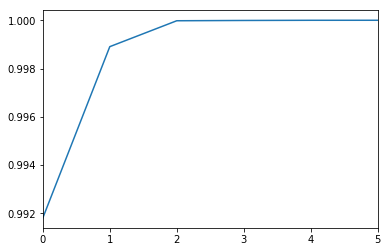

In [62]:
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.plot(cumulative)
plt.xlim([0,5])

It seems that we have almost all information in 4/5 dimensions:

In [63]:
cumulative[0:5]

[0.99181402957905196,
 0.99890600052501666,
 0.99997880589675381,
 0.99999076016130994,
 0.99999812517908937]

In [72]:
dfr = pd.DataFrame(data=reduced[:,0:5],columns=['col1','col2','col3','col4','col5'])
dfr['y'] = y

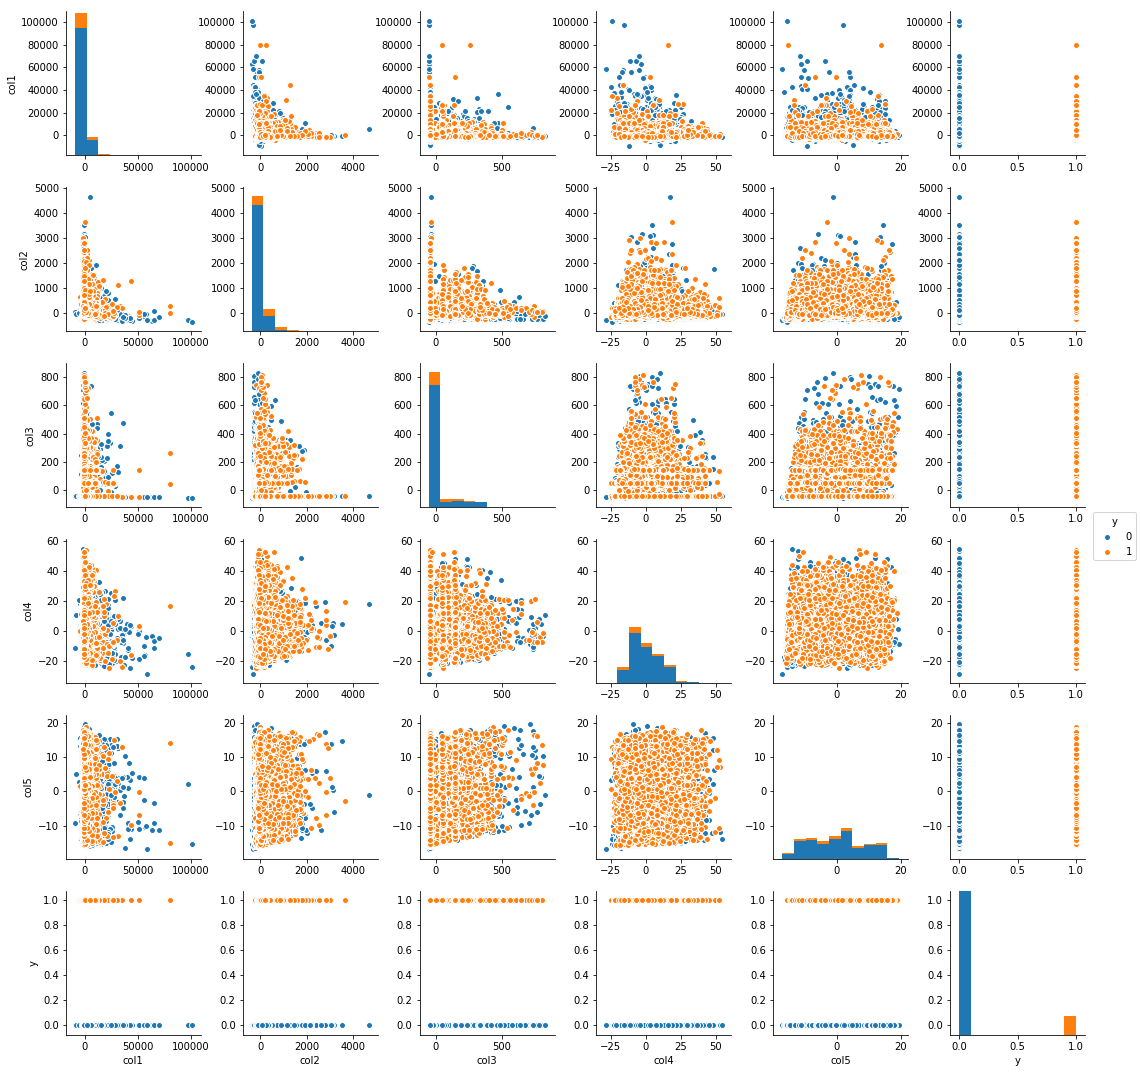

In [78]:
sns.pairplot(dfr, hue='y')

Let's export two datasets, one with all variables and other with just 5 derivated from PCA: 

In [79]:
df_dummies.to_csv('../datasets/deposit_ml.csv')

In [80]:
dfr.to_csv('../datasets/deposit_ml_reduced.csv')

# End of Analysis!